In [11]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [12]:
x_src_path = '../Dataset/assignment1New.json'
y_src_path = '../DataBook/Assignment1_Data_Analyst.xlsx'

In [13]:
data = pd.read_json(x_src_path)


In [14]:
def flatten(nested_list):
    """Flatten an arbitrarily nested list."""
    result = []
    for item in nested_list:
        if isinstance(item, list):
            result.extend(flatten(item))
        else:
            result.append(item)
    return result

X_flattened = [flatten(x) for x in data.values]

max_len = max(len(sublist) for sublist in X_flattened)

# Step 2: Pad shorter sublists with 0s to match the maximum length
X_flattened_padded = [sublist + [0]*(max_len - len(sublist)) for sublist in X_flattened]

In [15]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [16]:
# X = np.array(X_flattened_padded)
X = data.values
y = plagiarised_array

In [17]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [19]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 0.5116279069767442
Test data score: 0.45454545454545453


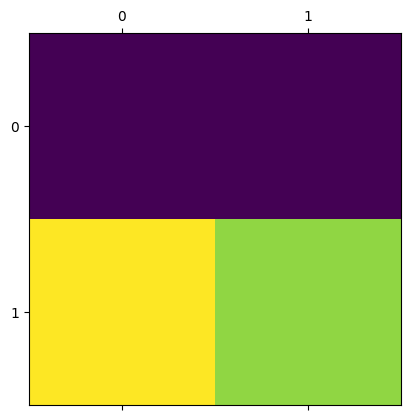

In [20]:
cm = confusion_matrix( p.predict(X_test), y_test)
# plt.set_cmap()
plt.matshow(cm)